In [1]:

import numpy as np
from skimage import data, filters, draw, io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import disk


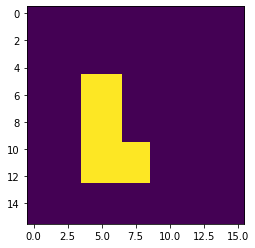

In [2]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [3]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [4]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0],SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False,False),(False,False)))

In [5]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]
        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

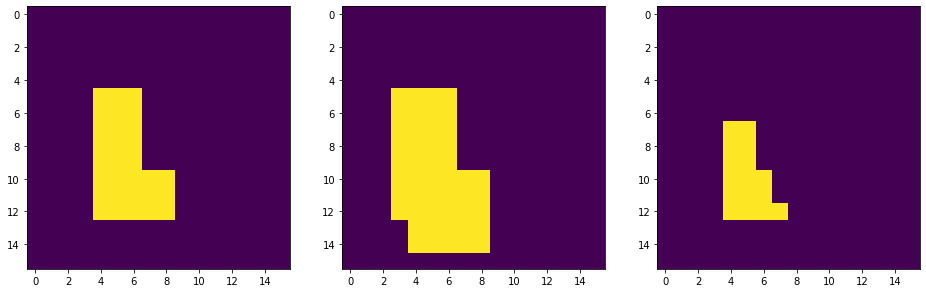

In [6]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

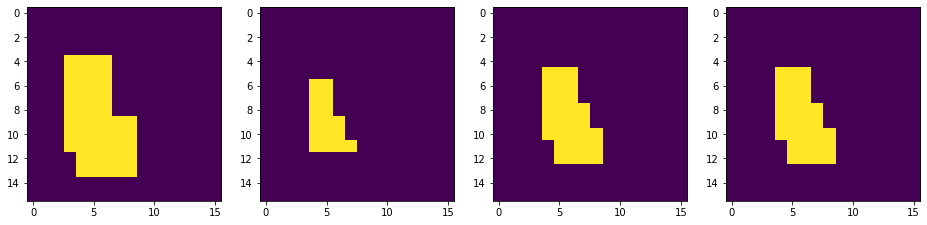

In [7]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)


Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

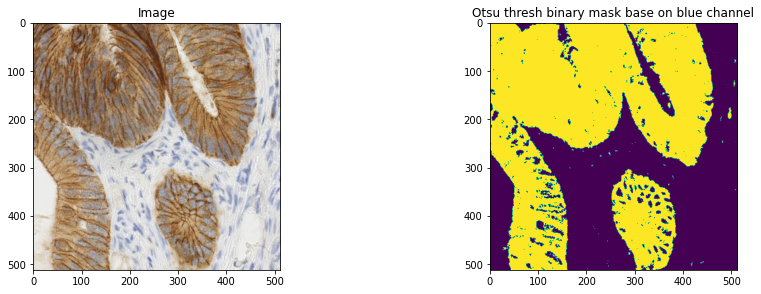

In [8]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel')

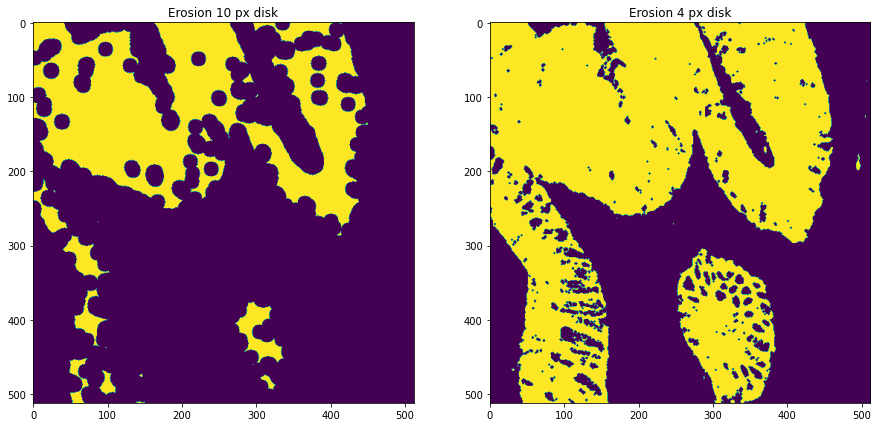

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(1)))

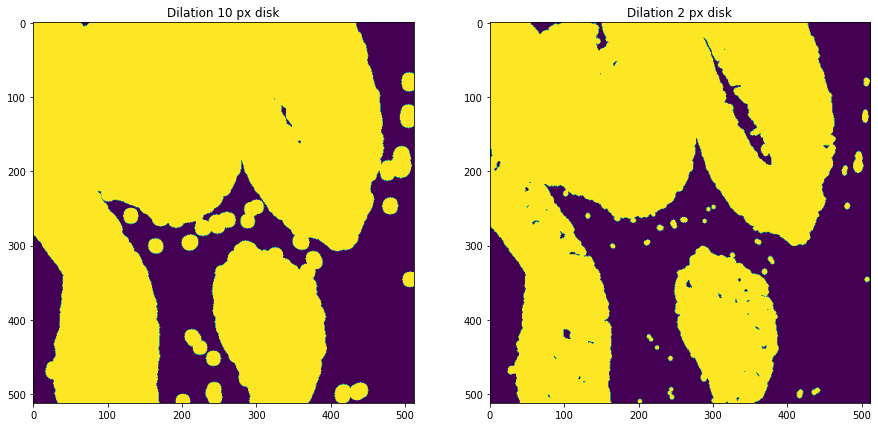

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)))

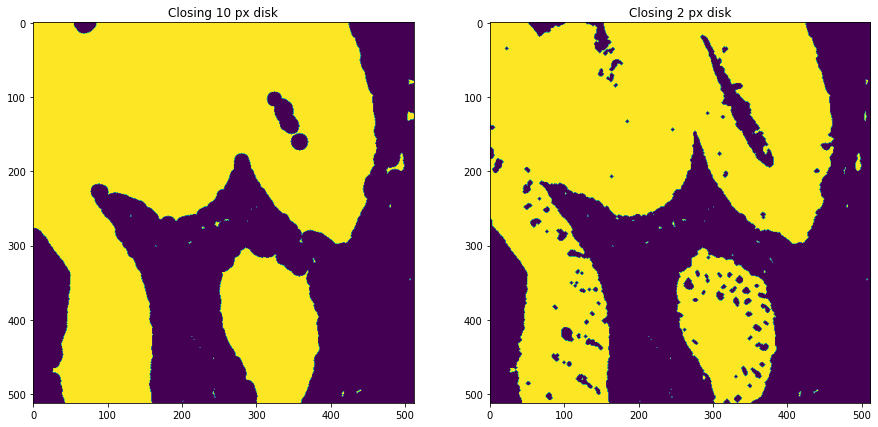

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)))

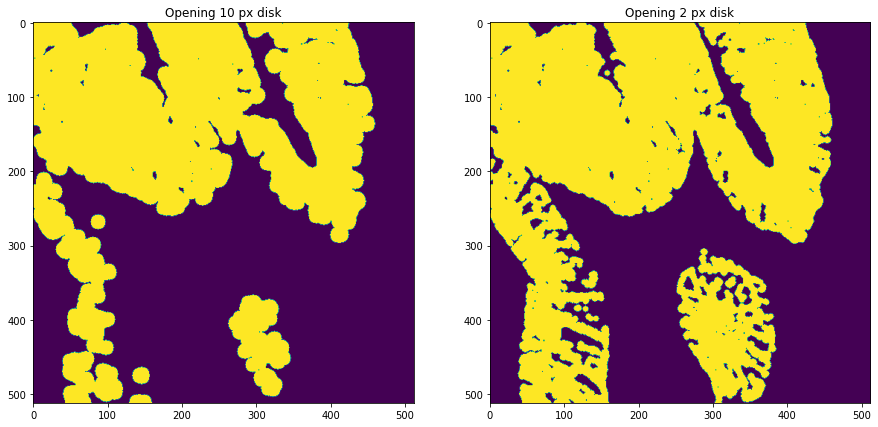

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)))

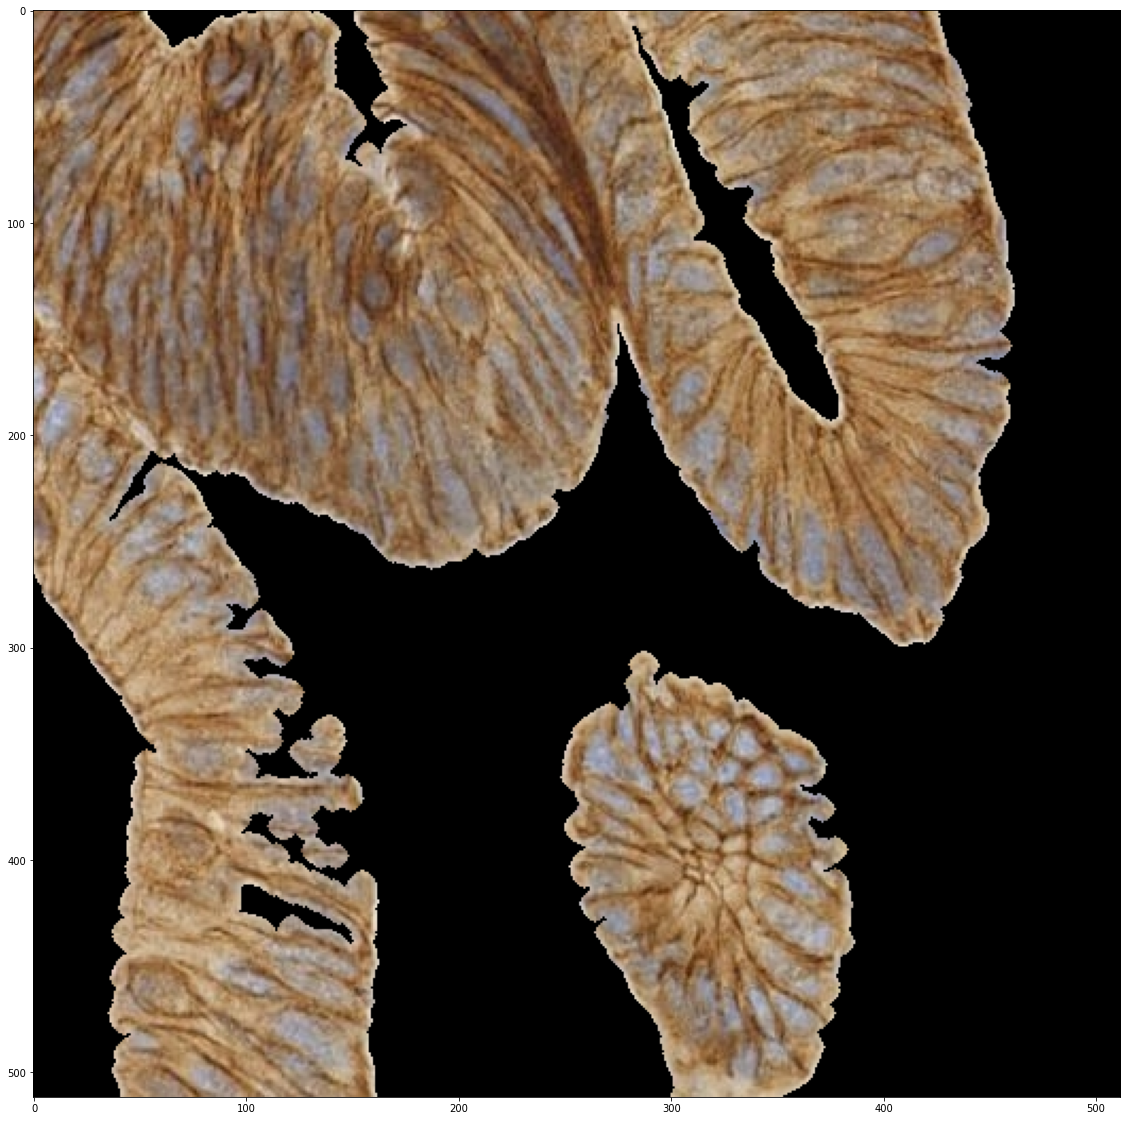

In [13]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

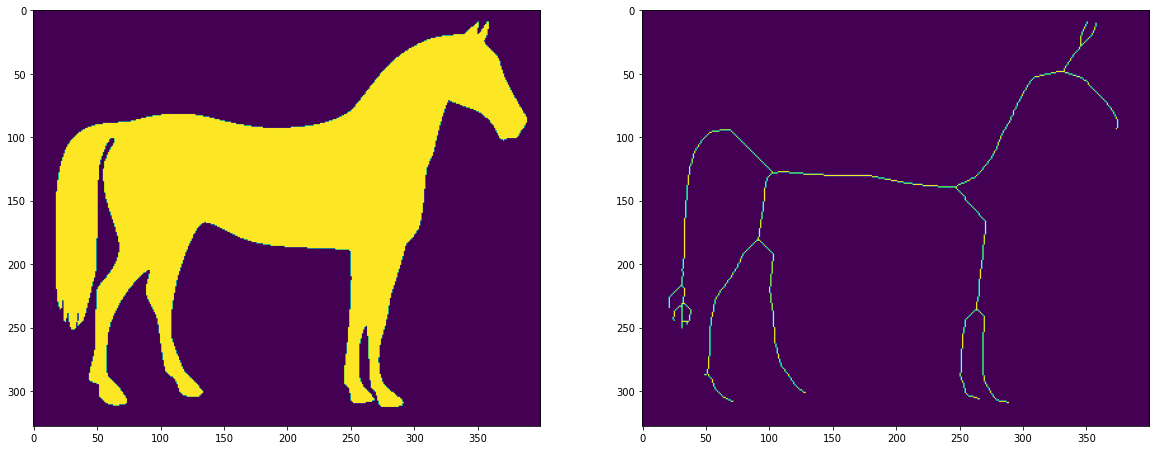

In [14]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))


# Dokoncit cvicenie  54 -57


Text(0.5, 1.0, 'Skeleton')

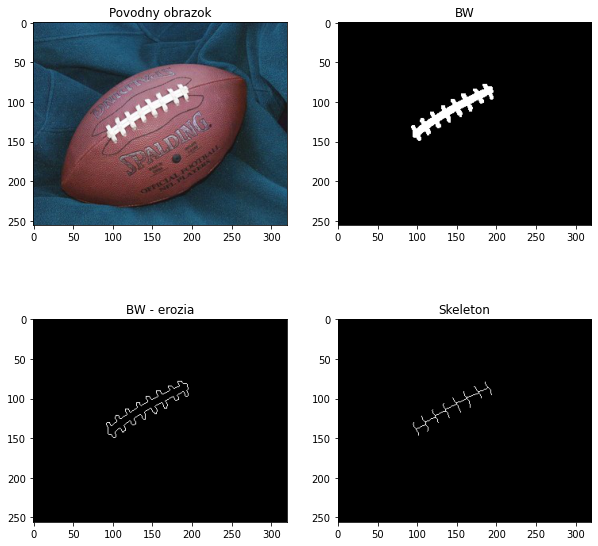

In [15]:
I = plt.imread("./football.jpg")
I_g = rgb2gray(I)

mask = ((I_g*255).astype(np.uint8)) > 170
mask_o = morphology.opening(mask, morphology.square(3))
mask_e = morphology.erosion(mask_o,morphology.disk(1))
mask_o_e = np.logical_xor(mask_o, mask_e)
skeleton = morphology.skeletonize(mask_o)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(I)
plt.title("Povodny obrazok")
plt.subplot(222)
plt.imshow(mask_o,cmap="gray")
plt.title("BW")
plt.subplot(223)
plt.imshow(mask_o_e,cmap="gray")
plt.title("BW - erozia")
plt.subplot(224)
plt.imshow(skeleton,cmap="gray")
plt.title("Skeleton")

<ipython-input-16-d6227fd80919>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  Im = rgb2gray(io.imread('rice.png'))


Text(0.5, 1.0, 'Pixely zmenene bwareaopen')

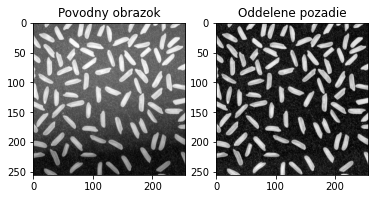

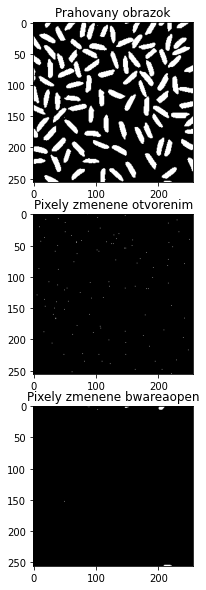

In [16]:
SE = morphology.rectangle(3,1)
I = np.random.randint(0, high=25, size=(5,5))
I1=morphology.dilation(I,SE)
I2=morphology.erosion(I,SE)


Im = rgb2gray(io.imread('rice.png'))
plt.figure()
plt.subplot(121)
plt.imshow(Im,cmap='gray')
plt.title('Povodny obrazok')

background = morphology.opening(Im,morphology.disk(15))
I1= Im-background
plt.subplot(122)
plt.imshow(I1,cmap='gray')
plt.title('Oddelene pozadie')

thresh = threshold_otsu(I1)
I2 = I1 > thresh
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(I2,cmap='gray')
plt.title('Prahovany obrazok')

I3=morphology.opening(I2,morphology.disk(1))
plt.subplot(312)
plt.imshow((I3!=I2),cmap='gray')
plt.title('Pixely zmenene otvorenim')


I4=morphology.remove_small_objects(I2,50)
plt.subplot(313)
plt.imshow((I4!=I2),cmap='gray')
plt.title('Pixely zmenene bwareaopen')

Text(0.5, 1.0, 'Dilation')

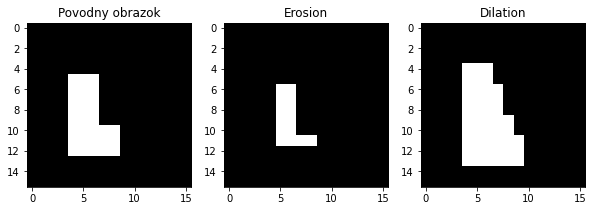

In [19]:
from scipy import signal
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True

SE = np.array([[1, 0],[1, 0],[1, 1]])

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(I, cmap='gray')
plt.title('Povodny obrazok')

plt.subplot(132)
plt.imshow(signal.convolve2d(I, SE, mode='same') > (np.count_nonzero(SE)-0.5), cmap='gray')
plt.title('Erosion')

plt.subplot(133)
plt.imshow(signal.convolve2d(I, SE, mode='same') > 0.5, cmap='gray')
plt.title('Dilation')


